
Link to the example 
Sound classification using Images, fastai

https://towardsdatascience.com/sound-classification-using-images-68d4770df426



In [ ]:
from fastai import *
from fastai.vision import *
import numpy as np
import librosa as lr


## solution to ERRORS 

usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "

seems that some issues with torch that is used in colab
Forum 33 Try to install specific version of torch in your colab before run fastAI python code

!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"


     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 23.3MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Display the audio file 

In [ ]:
import IPython
IPython.display.Audio("/content/drive/My Drive/1.wav")

another good reading resource

Audio Classification using FastAI and On-the-Fly Frequency Transforms

https://towardsdatascience.com/audio-classification-using-fastai-and-on-the-fly-frequency-transforms-4dbe1b540f89



We have 2 options to convert the audio files to spectrograms, matplotlib or librosa. We will go for the latter because it is easier to use and well known in the sound domain. Before we use it we just need to install a little dependency to ensure librosa works well


I installed librosa becauseI wanted to use it but it didnt work so I used wavfile later.

In [ ]:
pip install librosa


The below code is for single channel or mono audio  so if i use it for gravel 
classification it gives the following errors **ValueError: **only 1-dimensional arrays can be us 

https://dsp.stackexchange.com/questions/10743/generating-spectrograms-in-python-with-less-noise

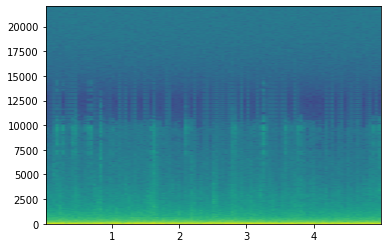

In [ ]:
import pylab
from scipy.io import wavfile

fs, frames = wavfile.read("/content/drive/My Drive/gravel.wav")

channels = [
    np.array(frames[:, 0]),
    np.array(frames[:, 1])
]

# generate specgram
Pxx, freqs, t, plot = pylab.specgram(
    channels[0],
    NFFT=4096, 
    Fs=44100, 
    detrend=pylab.detrend_none,
    window=pylab.window_hanning,
    noverlap=int(4096 * 0.5))



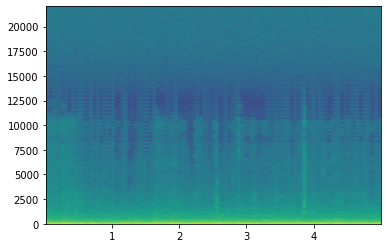

In [ ]:
import pylab
from scipy.io import wavfile


fs, frames = wavfile.read("/content/drive/My Drive/nongravel.wav")

channels = [
    np.array(frames[:, 0]),
    np.array(frames[:, 1])
]

# generate specgram
Pxx, freqs, t, plot = pylab.specgram(
    channels[0],
    NFFT=4096, 
    Fs=44100, 
    detrend=pylab.detrend_none,
    window=pylab.window_hanning,
    noverlap=int(4096 * 0.5))



In [ ]:
import wave, os, glob
import pylab
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib


zero = []
path = '/content/drive/My Drive/audiofiles/gravel'
files = os.listdir(path)
gravel_counter= 0

for filename in glob.glob(os.path.join(path, '*.wav')):
    s = wave.open(filename, 'r')
    fs, frames = wavfile.read(filename)
    channels = [
         np.array(frames[:, 0]),
        np.array(frames[:, 1])
          ]
 
# generate specgram

    w = 10
    h = 7
    d = 70
    fig = plt.figure(figsize=(w, h), dpi=d)
    Pxx, freqs, t, plot = pylab.specgram(
    channels[0],
    NFFT=4096, 
    Fs=44100, 
    detrend=pylab.detrend_none,
    window=pylab.window_hanning,
    noverlap=int(4096 * 0.5))
   # print(filename)
#print(files)
    output_dir = "/content/drive/My Drive/Spectogram/Gravel"
#fig.savefig('{}/graph.png'.format(output_dir)) # old correct one 
    #print(s)
    
    gravel_counter = gravel_counter + 1
    #print(gravel)
    gravel = "gravel" + str(gravel_counter) + ".png"
    #print(filename)
    filepath = os.path.join(output_dir, gravel)
    
    plt.savefig('/content/drive/My Drive/Spectogram/Gravel/' + gravel)
    plt.close()
    #print(filepath)
    #fig.savefig({}/filenamesave.format(output_dir))
#fig.savefig('{}/graph'+.png'.format(output_dir))
print("end")

end


For Non Gravel sounds 

In [ ]:
import wave, os, glob
import pylab
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib


zero = []
path = '/content/drive/My Drive/audiofiles/non_gravel'
files = os.listdir(path)
ngravel_counter= 0

for filename in glob.glob(os.path.join(path, '*.wav')):
    s = wave.open(filename, 'r')
    fs, frames = wavfile.read(filename)
    channels = [
         np.array(frames[:, 0]),
        np.array(frames[:, 1])
          ]
 
# generate specgram

    w = 10
    h = 7
    d = 70
    fig = plt.figure(figsize=(w, h), dpi=d)
    Pxx, freqs, t, plot = pylab.specgram(
    channels[0],
    NFFT=4096, 
    Fs=44100, 
    detrend=pylab.detrend_none,
    window=pylab.window_hanning,
    noverlap=int(4096 * 0.5))
  
    output_dir = "/content/drive/My Drive/Spectogram/Non-gravel"

    
    ngravel_counter = ngravel_counter + 1
  
    ngravel = "Non-gravel" + str(ngravel_counter) + ".png"
  
    filepath = os.path.join(output_dir, gravel)
    
    plt.savefig('/content/drive/My Drive/Spectogram/Non-gravel/' + ngravel)
    plt.close()
   
print("end")

end


classification part 

In [ ]:

path = "/content/drive/My Drive/Spectogram";

path

'/content/drive/My Drive/Spectogram'

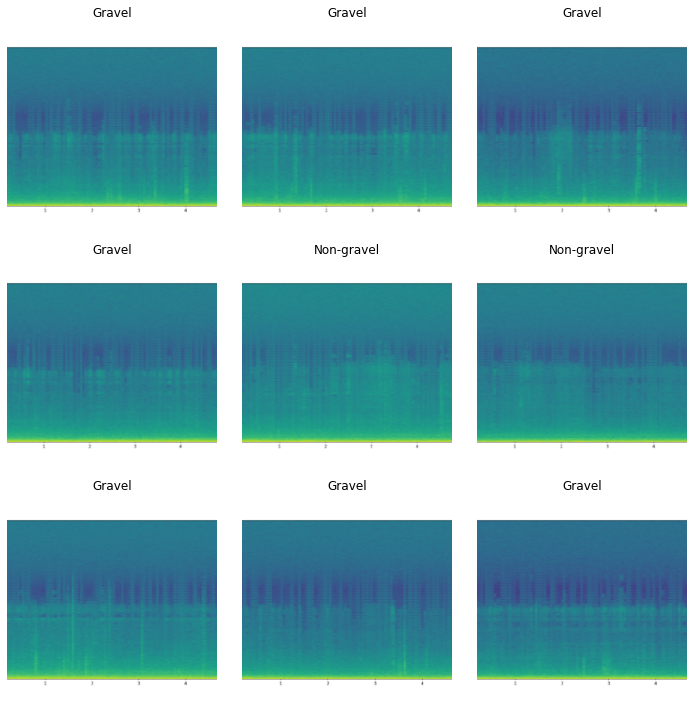

In [ ]:
data = (ImageList.from_folder(path)
      .split_by_rand_pct()
      .label_from_folder()
      .transform([],size =224)
      .databunch())
data.show_batch(rows=3, figsize=(10,10))




In [ ]:
data.normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy])


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model

In [ ]:
learn.fit_one_cycle(10)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.292108,1.744478,0.340426,0.659574,00:16
1,1.195238,1.300250,0.340426,0.659574,00:07
2,0.927550,0.491724,0.212766,0.787234,00:06
3,0.735525,0.387641,0.170213,0.829787,00:06
4,0.607243,0.362773,0.234043,0.765957,00:06
5,0.501051,0.496762,0.191489,0.808511,00:06
6,0.422047,0.555415,0.170213,0.829787,00:06
7,0.369687,0.533067,0.148936,0.851064,00:06
8,0.323575,0.504000,0.106383,0.893617,00:06
9,0.286102,0.406760,0.127660,0.872340,00:06


In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

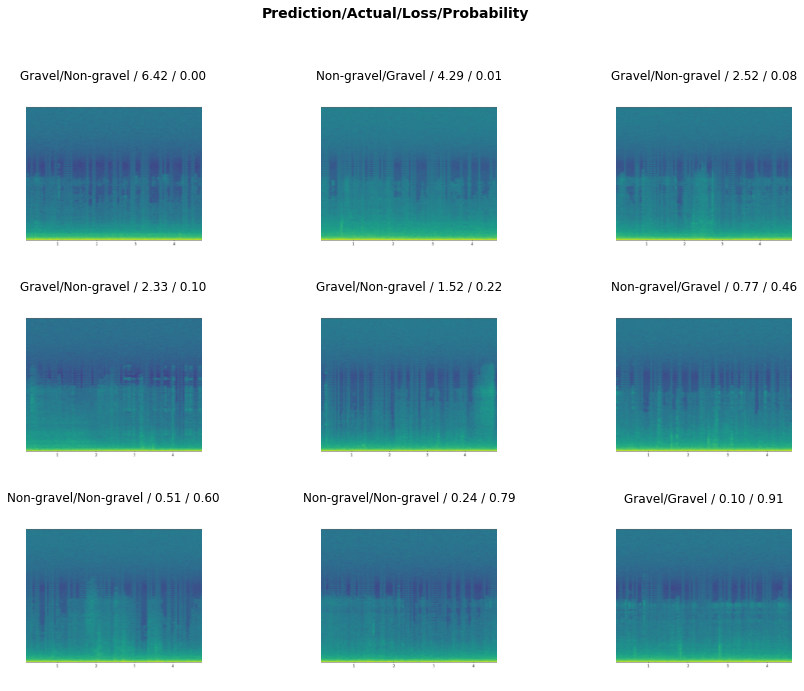

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


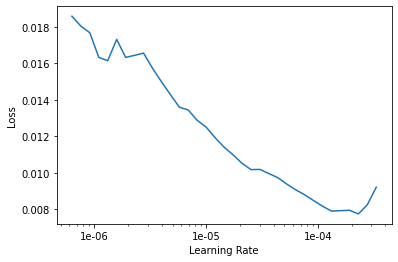

In [ ]:
learn.recorder.plot()


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.027285,0.299077,0.085106,0.914894,00:07
1,0.036268,0.245371,0.127660,0.872340,00:07
2,0.028660,0.192131,0.063830,0.936170,00:07
3,0.027103,0.157950,0.063830,0.936170,00:07
4,0.022239,0.141795,0.042553,0.957447,00:07
5,0.020072,0.168879,0.042553,0.957447,00:07
6,0.017383,0.215570,0.063830,0.936170,00:07
7,0.015289,0.262880,0.063830,0.936170,00:07
8,0.013922,0.307496,0.063830,0.936170,00:07
9,0.013757,0.336888,0.063830,0.936170,00:07
